In [214]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time

In [215]:
#funkce
polyno = lambda x: 0.2*x**4 - 2*x**5 + 1        #polynomiální rovnice
harmo = lambda x: 2*np.sin(5*x)                 #harmonická rovnice
loga = lambda x: -1/x + np.log10(x)             #logaritmická rovnice

C:\Users\PC\AppData\Local\Temp\ipykernel_4064\1570743145.py:4: RuntimeWarning: invalid value encountered in log10
  loga = lambda x: -1/x + np.log10(x)             #logaritmická rovnice


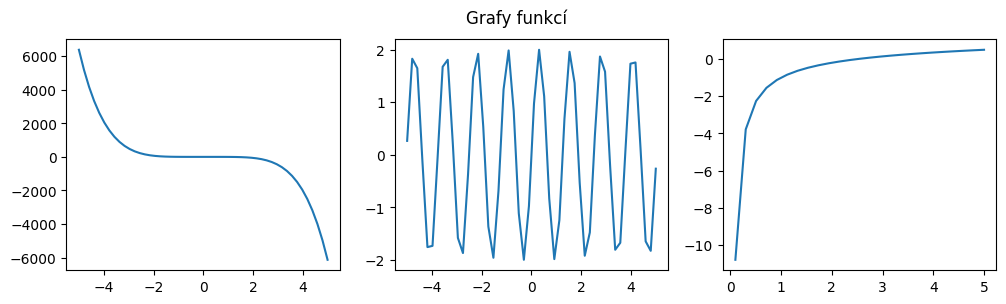

In [216]:
x = np.linspace(-5,5)
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.plot(x,polyno(x))

plt.subplot(132)
plt.plot(x,harmo(x))

plt.subplot(133)
plt.plot(x,loga(x))

plt.suptitle('Grafy funkcí')
plt.show()

In [217]:
#bisekce - půlení intervalů
def bisekce(c,d,f):
    cas_z = time.perf_counter()
    a = c
    b = d
    i = 0
    while (b-a)>10**-10:
        i+=1
        s = (a + b)/2
        if f(a)*f(s) < 0:
            b = s
        else:
            a = s
    cas_k = time.perf_counter()
    cas = (1000*(cas_k-cas_z))
    return f"bisekce:\t řešení - {a} \t po {i}. iteraci \t za {cas} ms"

In [218]:
#funkce na derivaci
def df(x,f):
    presnost = 0.001
    return (f(x+presnost)-f(x-presnost))/(2*presnost)

#Newtonova metoda - metoda tečen
def Newton(a,b,f):
    cas_z = time.perf_counter()
    presnost = 0.001
    i = 0
    s = (a+b)/2
    d = a
    
    while abs(s-d)>10**-10:
        i += 1
        d = s
        s = d - f(d)/df(d,f)
        cas_k = time.perf_counter()
        cas = (1000*(cas_k-cas_z))
    return f"Newton: \t řešení - {d} \t po {i}. iteraci \t\t za {cas} ms"

In [219]:
print("exponenciální rovnice:\n" + bisekce(-1,3,polyno) + "\n" + Newton(-1,3,polyno))
print("harmonická rovnice:\n" + bisekce(-1,3,harmo) + "\n" + Newton(-1,3,harmo))
print("logaritmická rovnice:\n" + bisekce(0.1,3,loga) + "\n" + Newton(-1,3,loga))


exponenciální rovnice:
bisekce:	 řešení - 0.8915134926792234 	 po 36. iteraci 	 za 0.13870000111637637 ms
Newton: 	 řešení - 0.8915134927373995 	 po 5. iteraci 		 za 0.029499999072868377 ms
harmonická rovnice:
bisekce:	 řešení - 0.6283185306820087 	 po 36. iteraci 	 za 0.2702000019780826 ms
Newton: 	 řešení - 1.8849555921538783 	 po 7. iteraci 		 za 0.08600000001024455 ms
logaritmická rovnice:
bisekce:	 řešení - 2.5061841455113614 	 po 35. iteraci 	 za 0.2268999996886123 ms
Newton: 	 řešení - 2.5061841455887692 	 po 7. iteraci 		 za 0.08159999924828298 ms


Z výstupu můžeme vidět, že Newtonova metoda je rychlejší a využívá i méně iterací a po přezkomání s GeoGebrou jsou tyto výsledky i o něco přesnější.